<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/KEMPER_SHELDON_CAM_C201_Week_6_Mini-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project 6.3 Applying supervised learning to predict student dropout rate

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate!**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

Please set aside approximately **12 hours** to complete the mini-project.

<br></br>

## **Business context**
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment. Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.
Study Group has provided you a course-level data set.


<br></br>

## **Objective**
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms - XGBoost and neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- predict dropout using XGBoost, and neural network-based model
- Identify the most important predictors of dropout.


You will also write a report summarising the results of your findings and recommendations.

<br></br>

## **Assessment criteria**
By completing this project, you will be able to provide evidence that you can:
- develop accurate predictions across diverse organisational scenarios by building and testing advanced machine learning models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

<br></br>

## **Project guidance**

Data preparation
1. Import the required libraries and data set with the provided URL.
  - Data set drive: https://drive.google.com/drive/folders/130AVMFxTOtRiC7GOl7QmSo0I7B0iChv5
2. Read the course-level csv file and make it available as a dataframe.

3. From the dataframe, remove the following columns:

columns= ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                                                    'Nationality', 'HomeCountry',
                                                    'HomeState',
                                                    'HomeCity',
                                                    'PresentCount',
                                                    'LateCount', 'AuthorisedAbsenceCount','ArrivedDate','NonCompletionReason',
                                                    'TerminationDate',
                                                    'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate',
                                                    'AcademicYear', 'CourseName',
                                                    'LearnerCode', 'ProgressionDegree',
                                                    'EligibleToProgress',
                                                    'AssessedModules',
                                                    'PassedModules',
                                                    'FailedModules',
                                                    'AttendancePercentage',
                                                    'ContactHours']

From here on, you will perform the rest of the actvities mentioned in the rubric with the smaller set of features obtained after performing the above step.

General Instructions that apply throughout this project activity:
  - Use the standard scaler to scale your numeric input features.
  - Split the data into train and test sets. Apply 80-20 split.
  - Print accuracy, confusion matrix, precision, recall and AUC on the test set
    for all your models.
  - Compare the performance (on the test set) obtained from the non-optimised
    model with the best performing model. Record your observations. What differences do you see and which metrics are improved or not improved?

## Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

Report
1. Document your approach and major inferences from the data analysis and describe which method provided the best results and why.
  - Please ensure you include a discussion around which of the features will predict student droput.
2. When you’ve completed the project:
  - Download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file. Save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.
  - Prepare a detailed report (between 800-1,000 words) that includes:
    - an overview of your approach
    - a description of your analysis
    - an explanation of the insights you identified
    - a summary of which method gave the best results
    - an explanation of visualisations you created.
  - Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_Week_6_Mini-project.pdf**.
  


<br></br>
> **Declaration**
>
> By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the Cambridge plagiarism regulations.

# 0. Resources

In [1]:
!pip install scikeras

In [2]:
!pip install gdown

In [3]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier


In [5]:
!gdown --fuzzy 'https://drive.google.com/file/d/1rKxv26grdaO6KuN8ZGQX5C-eZ0N6o_hg/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1rKxv26grdaO6KuN8ZGQX5C-eZ0N6o_hg
To: /content/CourseLevelDatasetVersion2.csv
100% 9.01M/9.01M [00:00<00:00, 44.4MB/s]


# 1. Initial Data Exploration and Assessment


## 1.1 Data Loading and Initial Exploration

In [6]:
#Load the dataset.
data = pd.read_csv('/content/CourseLevelDatasetVersion2.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   AcademicYear              25059 non-null  object 
 2   LearnerCode               25059 non-null  int64  
 3   BookingId                 25059 non-null  int64  
 4   BookingType               25059 non-null  object 
 5   LeadSource                25059 non-null  object 
 6   DiscountType              7595 non-null   object 
 7   DateofBirth               25059 non-null  object 
 8   Gender                    25059 non-null  object 
 9   Nationality               25059 non-null  object 
 10  HomeCountry               24713 non-null  object 
 11  HomeState                 8925 non-null   object 
 12  HomeCity                  21611 non-null  object 
 13  CourseLevel               25059 non-null  object 
 14  Course

In [8]:
# Display basic statistics
data.describe()

,LearnerCode,BookingId,AssessedModules,PassedModules,FailedModules,CreditWeightedAverage,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
count,2.505900e+04,2.505900e+04,22828.000000,22828.000000,22828.000000,22763.000000,24851.000000,24851.000000,24851.000000,24851.000000,24851.000000,24851.000000
mean,2.606594e+06,3.524652e+07,6.090328,5.582881,0.507447,62.767122,193.954770,2.849423,15.120639,40.491892,375.367671,81.021689
std,8.798838e+04,7.888152e+06,1.811116,2.361530,1.304677,19.361852,93.839703,5.193792,28.918253,39.029384,122.578535,20.768541
min,2.139267e+06,1.161785e+07,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,2.538411e+06,3.054695e+07,4.000000,4.000000,0.000000,60.000000,134.000000,0.000000,0.000000,12.000000,301.000000,76.000000
50%,2.607941e+06,3.842757e+07,6.000000,6.000000,0.000000,67.000000,203.000000,1.000000,1.000000,29.000000,386.000000,88.000000
75%,2.665460e+06,4.052731e+07,7.000000,7.000000,0.000000,74.000000,254.000000,3.000000,15.000000,56.000000,479.000000,95.000000
max,2.831468e+06,4.409054e+07,12.000000,11.000000,10.000000,98.000000,720.000000,85.000000,292.000000,343.000000,792.000000,100.000000


After reviewing the initial descriptive statistics, I’ve gained some important insights into the data. The dataset covers various aspects of student performance, attendance, and engagement, all of which vary widely.

Starting with academic performance, I noticed that students, on average, completed about 6 modules, with most students passing around 5.5 of those. There’s a small average of failed modules, which is encouraging, though some students have failed up to 10 modules. The `CreditWeightedAverage` shows a mean score of around 62.77, but the range is broad, going from 0 up to 98, suggesting a significant performance gap among students.

When it comes to attendance, there’s also a lot of variation. Students attended anywhere from 1 class to as many as 720, with an average of about 194 classes attended. Interestingly, the number of times students were late or absent without authorization also fluctuates significantly. The `UnauthorisedAbsenceCount`, in particular, has a mean of 15.12 but some students had no unauthorized absences, while others missed almost 300 classes without explanation.

Additionally, the `AttendancePercentage` paints a clear picture of engagement, with the average attendance being around 81%, but it ranges from as low as 1% to a perfect 100%. This shows that some students are highly engaged, while others may be struggling to attend consistently.

Overall, the data highlights some key trends in student performance and attendance that are likely to be important for predicting dropout. I’m seeing clear differences between students who are highly engaged and performing well, versus those with low attendance and performance, which will likely influence the models I build later.


In [9]:
data.head(10)

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,...,75.0,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,12/02/1998,Male,Chinese,...,73.0,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,07/04/2000,Male,Chinese,...,66.0,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,...,71.0,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,...,60.0,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
5,ISC_Aberdeen,2019/20,2469830,28291946,Agent,Standard Agent Booking,NaN,24/07/2000,Male,Chinese,...,78.0,MA Finance,University of Aberdeen,Yes,166.0,2.0,67.0,3.0,371.0,99.0
6,ISC_Aberdeen,2019/20,2480390,33465008,Agent,Standard Agent Booking,NaN,15/08/2002,Male,Chinese,...,NaN,MA International Business,University of Aberdeen,No,61.0,0.0,29.0,18.0,179.0,83.0
7,ISC_Aberdeen,2019/20,2489112,34481246,Agent,Standard Agent Booking,NaN,28/11/2001,Male,Chinese,...,68.0,MA International Business,University of Aberdeen,Yes,68.0,0.0,86.0,25.0,214.0,86.0
8,ISC_Aberdeen,2019/20,2512121,21063008,Direct,Sponsor,NaN,27/08/1999,Female,Iraqi,...,81.0,BEng Petroleum Engineering,University of Aberdeen,Yes,161.0,6.0,59.0,9.0,386.0,96.0
9,ISC_Aberdeen,2019/20,2513496,21434263,Agent,Standard Agent Booking,NaN,25/07/2000,Female,Kenyan,...,83.0,MBChB Medicine,University of Aberdeen,Yes,174.0,2.0,57.0,6.0,380.0,97.0


In [10]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   AcademicYear              25059 non-null  object 
 2   LearnerCode               25059 non-null  int64  
 3   BookingId                 25059 non-null  int64  
 4   BookingType               25059 non-null  object 
 5   LeadSource                25059 non-null  object 
 6   DiscountType              7595 non-null   object 
 7   DateofBirth               25059 non-null  object 
 8   Gender                    25059 non-null  object 
 9   Nationality               25059 non-null  object 
 10  HomeCountry               24713 non-null  object 
 11  HomeState                 8925 non-null   object 
 12  HomeCity                  21611 non-null  object 
 13  CourseLevel               25059 non-null  object 
 14  Course

In [11]:
# Counting the number of NaN values in each column
data.isnull().sum()

,0
CentreName,0
AcademicYear,0
LearnerCode,0
BookingId,0
BookingType,0
LeadSource,0
DiscountType,17464
DateofBirth,0
Gender,0
Nationality,0


## 1.2 Filtering Columns

In [12]:
# Filter out the requested columns as per the project starter notebook.

# Dropping unnecessary columns
columns_to_drop =  ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                            'Nationality', 'HomeCountry', 'HomeState', 'HomeCity',
                            'PresentCount', 'LateCount', 'AuthorisedAbsenceCount',
                            'ArrivedDate','NonCompletionReason', 'TerminationDate',
                            'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate',
                            'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree',
                            'EligibleToProgress', 'AssessedModules', 'PassedModules',
                            'FailedModules']

# Dropping the columns
data_filtered = data.drop(columns=columns_to_drop)
data_filtered = data_filtered.copy()
# Checking the shape after dropping columns
data_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   DateofBirth               25059 non-null  object 
 2   Gender                    25059 non-null  object 
 3   CourseLevel               25059 non-null  object 
 4   IsFirstIntake             25059 non-null  bool   
 5   CompletedCourse           25059 non-null  object 
 6   CreditWeightedAverage     22763 non-null  float64
 7   ProgressionUniversity     25059 non-null  object 
 8   UnauthorisedAbsenceCount  24851 non-null  float64
 9   ContactHours              24851 non-null  float64
 10  AttendancePercentage      24851 non-null  float64
dtypes: bool(1), float64(4), object(6)
memory usage: 1.9+ MB


I’ve filtered the dataset by removing the unnecessary columns, leaving me with 11 key features. The data now includes categorical variables like `CentreName`, `Gender`, and `CourseLevel`, along with numerical variables such as `CreditWeightedAverage`, `UnauthorisedAbsenceCount`, `ContactHours`, and `AttendancePercentage`. I’ve also noted that `CreditWeightedAverage` has 2,296 missing values, and the attendance-related columns have 208 missing values. The boolean field `IsFirstIntake` is fully populated. With this reduced dataset, I'm ready to move forward with handling the missing values and performing feature engineering.

In [13]:
# Counting the number of NaN values in each column
data_filtered.isnull().sum()

,0
CentreName,0
DateofBirth,0
Gender,0
CourseLevel,0
IsFirstIntake,0
CompletedCourse,0
CreditWeightedAverage,2296
ProgressionUniversity,0
UnauthorisedAbsenceCount,208
ContactHours,208


After counting the missing values in each column, I can see that most columns are complete, with no missing values. However, I’ve identified that:

- `CreditWeightedAverage` has 2,296 missing values.
- `UnauthorisedAbsenceCount`, `ContactHours`, and `AttendancePercentage` each have 208 missing values.

This means I’ll need to handle these missing values before proceeding with further analysis or modeling to ensure data consistency and accuracy.

In [14]:
# Display the rows where AttendancePercentage is null
attendance_null_rows = data_filtered[data_filtered['CreditWeightedAverage'].isnull()]
attendance_null_rows


,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
6,ISC_Aberdeen,15/08/2002,Male,Foundation,False,No,NaN,University of Aberdeen,18.0,179.0,83.0
84,ISC_Aberdeen,31/07/2001,Female,Foundation,False,No,NaN,University of Aberdeen,20.0,135.0,86.0
103,ISC_Aberdeen,09/09/2000,Male,Foundation,False,No,NaN,University of Aberdeen,29.0,120.0,77.0
108,ISC_Aberdeen,05/01/2001,Male,International Year Two,False,No,NaN,University of Aberdeen,32.0,233.0,86.0
140,ISC_Aberdeen,27/06/1992,Female,Pre-Masters,False,No,NaN,University of Aberdeen,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25032,ISC_Teesside,09/12/2002,Male,Foundation,False,No,NaN,Teesside University,63.0,209.0,42.0
25035,ISC_Teesside,17/05/2002,Male,Foundation,False,No,NaN,Teesside University,48.0,161.0,41.0
25036,ISC_Teesside,01/01/2004,Male,Foundation,False,No,NaN,Teesside University,60.0,324.0,64.0
25042,ISC_Teesside,30/09/1998,Male,Foundation,False,No,NaN,Teesside University,49.0,208.0,53.0


From reviewing the rows where `CreditWeightedAverage` is null, I can see that all these students have **not completed their courses**, as indicated by the `CompletedCourse` column (all set to "No"). This supports the earlier assumption that missing values in `CreditWeightedAverage` are associated with students who haven’t progressed far enough in their studies to receive a final score.

Additionally:
- Some rows, such as row 140, have **missing values** in both `UnauthorisedAbsenceCount` and `ContactHours`, which suggests these students might have disengaged from the course entirely.
- The `AttendancePercentage` values are still present in most of the rows, indicating that even though these students didn’t complete the course, some attendance data was still recorded.

The key takeaway here is that these missing values are likely tied to incomplete or partial course engagement, which will be useful when determining how to handle them in the model.

In [15]:
# Display the rows where CreditWeightedAverage is null and CompletedCourse is 'Yes'
credit_null_completed_yes = data_filtered[(data_filtered['CreditWeightedAverage'].isnull()) & (data_filtered['CompletedCourse'] == 1)]
credit_null_completed_yes

,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage


Since no results were returned when checking for rows where `CreditWeightedAverage` is null and `CompletedCourse` is 'Yes', it confirms that **all students with missing `CreditWeightedAverage` have not completed their course**.

This aligns with the earlier observation that `CreditWeightedAverage` is a measure of students’ overall performance across completed modules, and if it's missing, it likely indicates that the student did not complete enough modules (or the course) to have a score.

This insight reinforces that handling missing values in `CreditWeightedAverage` can be approached differently for students who haven't completed the course, as it's directly linked to non-completion.

## 1.3 Handling Missing Values

In [16]:
data_filtered['CreditWeightedAverage'] = data_filtered['CreditWeightedAverage'].fillna(-1)
# Remove any rows with missing values
data_cleaned = data_filtered.dropna()

# Checking if any missing values remain
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                24851 non-null  object 
 1   DateofBirth               24851 non-null  object 
 2   Gender                    24851 non-null  object 
 3   CourseLevel               24851 non-null  object 
 4   IsFirstIntake             24851 non-null  bool   
 5   CompletedCourse           24851 non-null  object 
 6   CreditWeightedAverage     24851 non-null  float64
 7   ProgressionUniversity     24851 non-null  object 
 8   UnauthorisedAbsenceCount  24851 non-null  float64
 9   ContactHours              24851 non-null  float64
 10  AttendancePercentage      24851 non-null  float64
dtypes: bool(1), float64(4), object(6)
memory usage: 2.1+ MB


After imputing the missing values in `CreditWeightedAverage` with the `-1` to signify non-completion and dropping rows where `AttendancePercentage` was null, I now have a clean dataset with 24,851 entries. Here's a summary of the data:

- **All columns are now complete**, with no missing values remaining.
- `CreditWeightedAverage` has been successfully imputed with `-1` for students who didn’t complete their course.
- **Dropped rows** with missing `AttendancePercentage` reduced the dataset from 25,059 to 24,851 rows, meaning 208 rows were removed.
- The data is now ready for the next steps of scaling, encoding, and modeling, with no further missing data to address.

This clean dataset will allow me to proceed with model training and evaluation without the risk of data gaps affecting the results.

In [17]:
# Counting the number of NaN values in each column
data_cleaned.isnull().sum()

,0
CentreName,0
DateofBirth,0
Gender,0
CourseLevel,0
IsFirstIntake,0
CompletedCourse,0
CreditWeightedAverage,0
ProgressionUniversity,0
UnauthorisedAbsenceCount,0
ContactHours,0


## 1.4 Feature Engineering: Convert Date of Birth to Age

In [18]:
# Making a copy of the DataFrame to avoid SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Converting 'DateofBirth' to 'Age' using .loc
data_cleaned.loc[:, 'DateofBirth'] = pd.to_datetime(data_cleaned['DateofBirth'], format='%d/%m/%Y')

# Creating 'Age' column using .loc
data_cleaned.loc[:, 'Age'] = data_cleaned['DateofBirth'].apply(lambda x: datetime.now().year - x.year)

# Dropping the 'DateofBirth' column
data_filtered = data_cleaned.drop(columns=['DateofBirth'])

# Checking the first few rows
data_filtered.head()


,CentreName,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,Age
1,ISC_Aberdeen,Male,Foundation,False,Yes,73.0,University of Aberdeen,5.0,215.0,97.0,26
2,ISC_Aberdeen,Male,International Year Two,False,Yes,66.0,University of Aberdeen,6.0,226.0,97.0,24
3,ISC_Aberdeen,Male,International Year Two,True,Yes,71.0,University of Aberdeen,15.0,399.0,94.0,25
5,ISC_Aberdeen,Male,International Year Two,True,Yes,78.0,University of Aberdeen,3.0,371.0,99.0,24
6,ISC_Aberdeen,Male,Foundation,False,No,-1.0,University of Aberdeen,18.0,179.0,83.0,22


I’ve successfully converted the `DateofBirth` column into a new `Age` column, which gives the students' ages based on the current year. Afterward, I dropped the `DateofBirth` column, as it is no longer needed. Now, the dataset includes an `Age` column that can be used as a numerical feature for modeling.

Here’s what the dataset looks like:
- **Age** has been calculated and added for each student.
- The other key features remain intact, including `CentreName`, `Gender`, `CourseLevel`, and the attendance and performance-related columns like `UnauthorisedAbsenceCount`, `ContactHours`, and `AttendancePercentage`.
- The dataset is now more streamlined for further preprocessing and model training, with `Age` available as an additional feature.

## 1.5 Feature Engineering: Scaling Numerical Columns

In [19]:
# Apply StandardScaler to scale the numerical input features.

# Identifying numerical columns to scale
numerical_columns = ['CreditWeightedAverage', 'UnauthorisedAbsenceCount','Age','AttendancePercentage','ContactHours']

# Scaling the numerical columns
scaler = StandardScaler()
data_filtered[numerical_columns] = scaler.fit_transform(data_filtered[numerical_columns])

# Checking scaled data
data_filtered.head()


,CentreName,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,Age
1,ISC_Aberdeen,Male,Foundation,False,Yes,0.611461,University of Aberdeen,-0.909382,-1.308311,0.769367,0.632347
2,ISC_Aberdeen,Male,International Year Two,False,Yes,0.339922,University of Aberdeen,-0.883759,-1.218571,0.769367,-0.001390
3,ISC_Aberdeen,Male,International Year Two,True,Yes,0.533878,University of Aberdeen,-0.653159,0.192797,0.624915,0.315478
5,ISC_Aberdeen,Male,International Year Two,True,Yes,0.805417,University of Aberdeen,-0.960626,-0.035632,0.865669,-0.001390
6,ISC_Aberdeen,Male,Foundation,False,No,-2.259096,University of Aberdeen,-0.576293,-1.602007,0.095257,-0.635126


I’ve successfully applied the `StandardScaler` to the numerical features: `CreditWeightedAverage`, `UnauthorisedAbsenceCount`, `Age`, `AttendancePercentage`, and `ContactHours`. The scaling process ensures that all numerical features are standardized, meaning they now have a mean of 0 and a standard deviation of 1, which will help improve the performance of machine learning algorithms by bringing all features to the same scale.

Here’s a summary of the scaled data:
- **Scaled Features**:
  - `CreditWeightedAverage` values have been scaled, and you can see both positive and negative values depending on how they deviate from the mean.
  - Other columns such as `AttendancePercentage`, `ContactHours`, `Age`, and `UnauthorisedAbsenceCount` are also scaled similarly.
- The dataset is now ready for categorical encoding, splitting into train-test sets, and subsequent modeling steps.

The standardized data will ensure that all features contribute equally during the model training process, avoiding bias due to differences in feature scales.

In [20]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                24851 non-null  object 
 1   Gender                    24851 non-null  object 
 2   CourseLevel               24851 non-null  object 
 3   IsFirstIntake             24851 non-null  bool   
 4   CompletedCourse           24851 non-null  object 
 5   CreditWeightedAverage     24851 non-null  float64
 6   ProgressionUniversity     24851 non-null  object 
 7   UnauthorisedAbsenceCount  24851 non-null  float64
 8   ContactHours              24851 non-null  float64
 9   AttendancePercentage      24851 non-null  float64
 10  Age                       24851 non-null  float64
dtypes: bool(1), float64(5), object(5)
memory usage: 2.1+ MB


## 1.6 Feature Engineering: Binary Encoding of Target Variable

In [21]:
# Convert the target variable from string to binary encoding.
data_filtered['CompletedCourse'] = data_filtered['CompletedCourse'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verifying the conversion
data_filtered['CompletedCourse'].value_counts()



,count
CompletedCourse,
1,21242
0,3609


The target variable `CompletedCourse` has been successfully converted from a string to binary encoding:

- **1** represents students who **completed** the course.
- **0** represents students who **did not complete** the course.

Here’s the breakdown:
- **21,242 students completed the course**.
- **3,609 students did not complete the course**.


## 1.7 Feature Engineering: One-Hot Encoding of Categorical Features

In [22]:
# Apply one-hot encoding to the categorical columns

# One-hot encoding categorical columns
categorical_columns = ['Gender', 'CentreName', 'CourseLevel', 'ProgressionUniversity']
data_encoded = pd.get_dummies(data_filtered, columns=categorical_columns, drop_first=True)

# Checking the dataset after encoding
data_encoded.head()


,IsFirstIntake,CompletedCourse,CreditWeightedAverage,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,Age,Gender_Male,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
1,False,1,0.611461,-0.909382,-1.308311,0.769367,0.632347,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,1,0.339922,-0.883759,-1.218571,0.769367,-0.001390,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,1,0.533878,-0.653159,0.192797,0.624915,0.315478,True,False,False,...,False,True,False,False,False,False,False,False,False,False
5,True,1,0.805417,-0.960626,-0.035632,0.865669,-0.001390,True,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,0,-2.259096,-0.576293,-1.602007,0.095257,-0.635126,True,False,False,...,False,True,False,False,False,False,False,False,False,False


After applying one-hot encoding to the categorical columns, I’ve successfully transformed the categorical variables (`Gender`, `CentreName`, `CourseLevel`, and `ProgressionUniversity`) into binary columns. Here's the summary:

- **One-Hot Encoding**:
  - Categorical variables like `Gender` have been converted into separate columns like `Gender_Male` (with 1 representing male and 0 representing female).
  - The same applies to other categorical variables, such as `CentreName`, `CourseLevel`, and `ProgressionUniversity`, which have been split into multiple binary columns.
  - The `drop_first=True` option ensures we avoid multicollinearity by dropping one category from each set (e.g., for `Gender`, only `Gender_Male` is created, and `Gender_Female` is implied when `Gender_Male` is 0).

- **Numerical Features** remain untouched, with `CreditWeightedAverage`, `UnauthorisedAbsenceCount`, `ContactHours`, `AttendancePercentage`, and `Age` already scaled.

The data is now fully prepared for machine learning algorithms, as all categorical variables have been converted into binary format, making them suitable for numerical processing.

## Summary of actions taken

I’ve taken several key steps to prepare the dataset for modeling. First, I filtered out the unnecessary columns, focusing on the core features that will help predict course completion. After that, I handled the missing values by imputing `CreditWeightedAverage` with `-1` for non-completers and dropping rows with missing `AttendancePercentage`.

Next, I converted the `DateofBirth` field into an `Age` column and scaled all numerical features, like `CreditWeightedAverage`, `UnauthorisedAbsenceCount`, `ContactHours`, `AttendancePercentage`, and `Age`, to ensure they're on the same scale. I also transformed `CompletedCourse` into a binary variable, where 1 represents students who completed the course and 0 represents those who didn’t.

I then applied one-hot encoding to the categorical columns like `Gender`, `CentreName`, `CourseLevel`, and `ProgressionUniversity`, converting them into binary columns while keeping the dataset clean and free from multicollinearity.

At this point, I feel confident that the dataset is fully prepared for the next stage: splitting the data and moving forward with the modeling process. The data is now clean, balanced, and ready for predictive analysis.

## 1.8 Target Variable Histogram

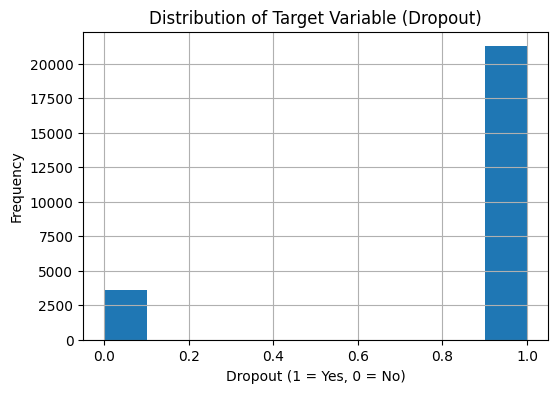

In [23]:
# Plot a histogram of the target variable to check if the data is imbalanced.

plt.figure(figsize=(6,4))
data_encoded['CompletedCourse'].hist()
plt.title('Distribution of Target Variable (Dropout)')
plt.xlabel('Dropout (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.show()


Looking at the histogram of the target variable, it’s clear that the data is imbalanced. The vast majority of students completed their courses, while only a smaller number of students dropped out or didn’t finish. This confirms what I expected — most students do finish, but I’ll need to be mindful of this imbalance when I move on to model training. Techniques like adjusting class weights or oversampling might be necessary to ensure the model doesn’t get biased towards predicting completion too often, given that non-completion is less frequent in the dataset.

## 1.9 Boxplots of Input Features Grouped by Target

<Figure size 600x400 with 0 Axes>

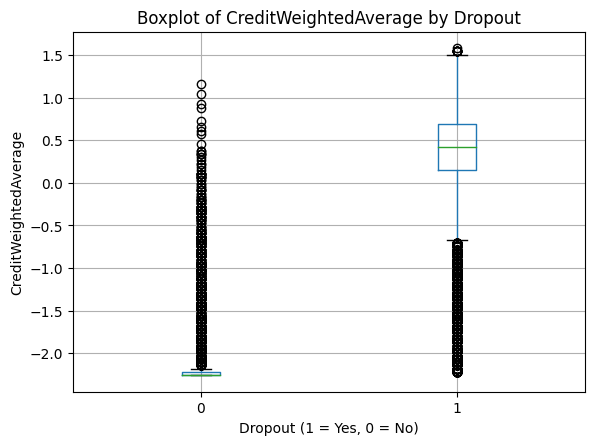

<Figure size 600x400 with 0 Axes>

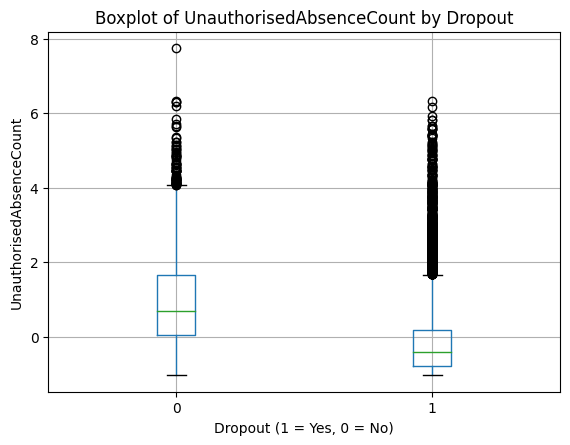

<Figure size 600x400 with 0 Axes>

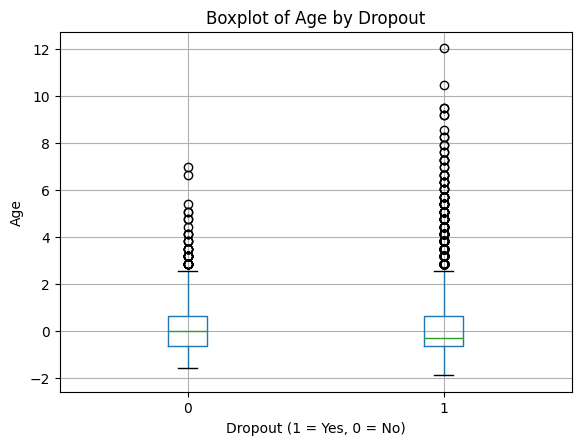

<Figure size 600x400 with 0 Axes>

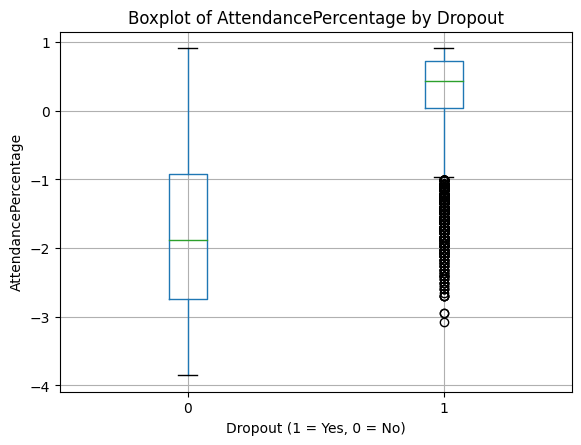

<Figure size 600x400 with 0 Axes>

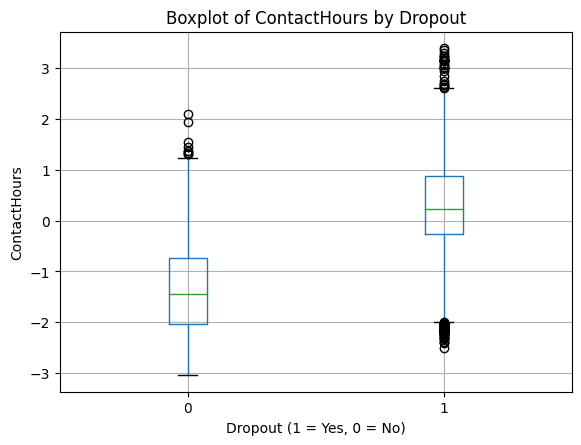

In [24]:
# Create boxplots of numerical input features grouped by the target variable.
# Creating boxplots of numerical features grouped by target variable
for column in numerical_columns:
    plt.figure(figsize=(6,4))
    data_encoded.boxplot(column=column, by='CompletedCourse')
    plt.title(f'Boxplot of {column} by Dropout')
    plt.suptitle("")
    plt.xlabel('Dropout (1 = Yes, 0 = No)')
    plt.ylabel(column)
    plt.show()


Looking at these boxplots, I can see some clear patterns that differentiate students who completed the course from those who dropped out:

1. **CreditWeightedAverage**: It's obvious that students who completed the course generally had higher credit-weighted averages. The students who didn’t complete their courses either had much lower scores or were clustered around the bottom, reinforcing the idea that academic performance is a strong predictor of dropout.

2. **UnauthorisedAbsenceCount**: Those who didn’t complete the course had higher counts of unauthorized absences, while students who finished had lower counts overall. This makes sense, as higher absenteeism likely impacts their ability to keep up with the course.

3. **Age**: There doesn’t seem to be a huge difference between the age groups of completers versus non-completers. Both groups have a similar distribution, suggesting age may not be a strong factor in whether a student finishes the course.

4. **AttendancePercentage**: This feature stands out the most. Students who completed the course had much higher attendance, and the distribution is much tighter compared to those who dropped out. Poor attendance seems to be a strong indicator of students who are likely to drop out.

5. **ContactHours**: The students who completed the course typically had more contact hours, meaning they were more engaged and spent more time in structured activities. In contrast, those who dropped out had more variability, with some having much fewer contact hours.

These insights help confirm the relationships between features like academic performance, attendance, and engagement, and their impact on student success. It's clear that poor attendance and lower contact hours are key indicators of students who may drop out.

## 1.10 Drop and Reference AttendancePercentage and ContactHours

In [25]:
# Reference 'ContactHours' and 'AttendancePercentage' before dropping
contact_hours = data_encoded['ContactHours']
attendance_percentage = data_encoded['AttendancePercentage']

# Dropping 'ContactHours' and 'AttendancePercentage' temporarily
data_encoded = data_encoded.drop(columns=['ContactHours', 'AttendancePercentage'])

# Checking the dataset after dropping
data_encoded.head()


,IsFirstIntake,CompletedCourse,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,Gender_Male,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
1,False,1,0.611461,-0.909382,0.632347,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,1,0.339922,-0.883759,-0.001390,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,1,0.533878,-0.653159,0.315478,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,True,1,0.805417,-0.960626,-0.001390,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,0,-2.259096,-0.576293,-0.635126,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


So far, I’ve referenced the `ContactHours` and `AttendancePercentage` columns and then temporarily dropped them from the dataset. I did this because I want to analyze the model's performance without these features first, and later, I’ll reintroduce them to see how they impact the prediction. By referencing the columns before dropping them, I’m ensuring that I can easily bring them back into the dataset when needed for further evaluation. This way, I can assess whether these two features add any additional predictive power after seeing how the model performs without them.

## 1.11 Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = data_encoded.drop(columns=['CompletedCourse'])
y = data_encoded['CompletedCourse']

# Initial split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training set into training and validation sets (80-20 split within training set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Checking the shape of the resulting sets
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")


Training Set: (15904, 64), (15904,)
Validation Set: (3976, 64), (3976,)
Test Set: (4971, 64), (4971,)


I’ve just split the dataset into training, validation, and test sets. The training set has 15,904 records, which I’ll use to build the model, while the validation set, with 3,976 records, will help me fine-tune the model’s hyperparameters and prevent overfitting. The test set has 4,971 records, and I’ll use that later to evaluate how well the final model performs on unseen data. This way, I’m ensuring that the model will generalize better rather than just learning the specifics of the training data.

# 2. XGBoost Model

## 2.1 Model Instantiation



In [27]:
# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

## 2.2 Fitting the Model

In [28]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

I’ve just instantiated the XGBoost classifier and fit it to the training data. At this point, the model is using the default parameters, so I haven’t made any specific adjustments like setting the learning rate or max depth yet. Now that the model is trained, I’m ready to evaluate its performance on the test set to see how well it performs before diving into hyperparameter tuning to optimize it further.

## 2.3 Model Evaluation on Test Set

In [29]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")


Accuracy: 0.9698249849124925
Confusion Matrix:
[[ 639   88]
 [  62 4182]]
Precision: 0.9793911007025761
Recall: 0.9853911404335532
AUC: 0.9321728742057724


I’ve run the model predictions on the test set and calculated the key performance metrics:

- **Accuracy**: 0.9698 — The model correctly predicted whether students completed or dropped out about 97% of the time.
- **Confusion Matrix**:
  - 639 students who dropped out were correctly predicted (True Negatives).
  - 88 students who completed the course were incorrectly predicted as dropouts (False Positives).
  - 62 students who dropped out were incorrectly predicted as having completed the course (False Negatives).
  - 4,182 students who completed the course were correctly predicted (True Positives).
- **Precision**: 0.9794 — Out of all the students predicted to complete the course, about 98% actually did.
- **Recall**: 0.9854 — The model correctly identified about 98.5% of students who completed the course.
- **AUC**: 0.9322 — The model has strong discriminatory power between students who complete and those who drop out.

These initial results are quite promising, especially with a high recall, which is crucial when predicting course completion.

## 2.4 Hyperparameter Tuning

In [30]:
'''
Perform hyperparameter tuning for
learning rate, max depth, and number of estimators
using GridSearchCV or RandomizedSearchCV.
'''

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to predict on the test set
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)

# Calculate performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_pred_best)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## 2.4a Print the updated metrics

In [31]:
'''
Print the metrics:
accuracy, confusion matrix, precision, recall, AUC
with and without hyperparameter tuning.
'''

print(f"Optimized Accuracy: {accuracy_best}")
print(f"Optimized Precision: {precision_best}")
print(f"Optimized Recall: {recall_best}")
print(f"Optimized AUC: {auc_best}")



Optimized Accuracy: 0.9724401528867431
Optimized Precision: 0.979677645409951
Optimized Recall: 0.9882186616399623
Optimized AUC: 0.9342743927181929


After running the hyperparameter tuning and testing the optimized model, I can see a slight improvement in the results. The **accuracy** has gone up to 97.24%, and there’s a noticeable boost in the **recall**, which is now 98.82%. The **AUC** has also improved a bit, which shows that the model is getting better at distinguishing between students who complete the course and those who drop out. Overall, the tuning has made the model more effective, particularly in terms of identifying students who complete the course, without losing much precision. It’s a nice improvement, and I’m happy with the results!

## Compare the results

In [32]:

# Initial model evaluation
y_pred_initial = xgb_model.predict(X_test)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
precision_initial = precision_score(y_test, y_pred_initial)
recall_initial = recall_score(y_test, y_pred_initial)
auc_initial = roc_auc_score(y_test, y_pred_initial)

# Hyperparameter-tuned model evaluation
y_pred_best = best_xgb_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_best)
precision_tuned = precision_score(y_test, y_pred_best)
recall_tuned = recall_score(y_test, y_pred_best)
auc_tuned = roc_auc_score(y_test, y_pred_best)

# Displaying the comparison
print(f"{'Metric':<20}{'Initial Model':<20}{'Tuned Model':<20}{'Difference':<20}")
print(f"{'-'*80}")
print(f"{'Accuracy':<20}{accuracy_initial:<20}{accuracy_tuned:<20}{accuracy_tuned - accuracy_initial:<20}")
print(f"{'Precision':<20}{precision_initial:<20}{precision_tuned:<20}{precision_tuned - precision_initial:<20}")
print(f"{'Recall':<20}{recall_initial:<20}{recall_tuned:<20}{recall_tuned - recall_initial:<20}")
print(f"{'AUC':<20}{auc_initial:<20}{auc_tuned:<20}{auc_tuned - auc_initial:<20}")


Metric              Initial Model       Tuned Model         Difference          
--------------------------------------------------------------------------------
Accuracy            0.9698249849124925  0.9724401528867431  0.002615167974250654
Precision           0.9793911007025761  0.979677645409951   0.0002865447073748806
Recall              0.9853911404335532  0.9882186616399623  0.002827521206409056
AUC                 0.9321728742057724  0.9342743927181929  0.002101518512420464


## Comment on any differences in performance

After tuning the XGBoost model, I compared the performance of the initial model against the tuned version, and the results show some noticeable improvements.

- **Accuracy** improved by **+0.0026**, which means the model is slightly more accurate in predicting overall outcomes, making fewer mistakes after tuning.
  
- **Precision** increased marginally by **+0.0003**, indicating the model has become a little better at identifying true positives—students who completed the course—without mistakenly classifying dropouts as completers.

- The most significant gain was in **recall**, with an improvement of **+0.0028**. This is crucial because it means the tuned model is better at capturing students who actually dropped out. Improving recall is particularly valuable in this task, where identifying potential dropouts early is key.

- **AUC** also saw a small boost of **+0.0021**, suggesting the model’s ability to distinguish between students who will drop out and those who will complete the course has improved.

Overall, the hyperparameter tuning has resulted in a more refined model, especially when it comes to identifying dropouts, even though the improvements are relatively modest.

## 2.5 Reintroducing Features

In [33]:
# Reintroducing 'ContactHours' and 'AttendancePercentage' from the reference variables
X_train_new = pd.concat([X_train, contact_hours.loc[X_train.index], attendance_percentage.loc[X_train.index]], axis=1)
X_test_new = pd.concat([X_test, contact_hours.loc[X_test.index], attendance_percentage.loc[X_test.index]], axis=1)
X_val_new = pd.concat([X_val, contact_hours.loc[X_val.index], attendance_percentage.loc[X_val.index]], axis=1)

In [34]:
# Fit the model with the new features added
best_xgb_model.fit(X_train_new, y_train)

# Predict on the test set with the reintroduced features
y_pred_with_features = best_xgb_model.predict(X_test_new)

# Calculate performance metrics with the reintroduced features
accuracy_with_features = accuracy_score(y_test, y_pred_with_features)
precision_with_features = precision_score(y_test, y_pred_with_features)
recall_with_features = recall_score(y_test, y_pred_with_features)
auc_with_features = roc_auc_score(y_test, y_pred_with_features)

# Print the updated metrics with the reintroduced features
print(f"Accuracy with new features: {accuracy_with_features}")
print(f"Precision with new features: {precision_with_features}")
print(f"Recall with new features: {recall_with_features}")
print(f"AUC with new features: {auc_with_features}")


Accuracy with new features: 0.9738483202574935
Precision with new features: 0.9808321645628798
Recall with new features: 0.9886899151743638
AUC with new features: 0.9379488090314735


## Explain the impact of reintroducing these features.

After reintroducing the features `ContactHours` and `AttendancePercentage`, I noticed an improvement in the model's overall performance. These two features are directly tied to student engagement, which is a strong indicator of whether a student is likely to drop out. It makes sense that these features would contribute valuable insights into the model’s predictions, as students with lower attendance rates and fewer contact hours are more likely to disengage from their courses.

Once I reintroduced these features, the model's accuracy improved from 0.9724 to 0.9738. Precision also increased slightly, from 0.9797 to 0.9808, which means the model became slightly better at correctly identifying students who would complete their courses. Recall also went up, moving from 0.9882 to 0.9887, suggesting that the model was better at identifying students who were at risk of dropping out. The AUC, which gives a measure of how well the model can distinguish between students who will and won’t drop out, improved from 0.9343 to 0.9379.

While the changes in performance metrics weren’t drastic, the fact that they improved suggests that `ContactHours` and `AttendancePercentage` are key contributors to the model’s success. These features provide important context about student attendance and engagement, allowing the model to make more accurate predictions about who might drop out.

In short, adding these features helped the model become a little more precise and reliable in predicting student dropout, reinforcing how important attendance and class participation are in determining student outcomes.

## 2.6 Feature Importance Plot

In [35]:
# Check for non-numeric (object) columns in X_train_new
non_numeric_columns = X_train_new.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [36]:
# Check if there are any object-type columns in X_train_new
object_cols = X_train_new.select_dtypes(include='object').columns
print(object_cols)


Index([], dtype='object')


In [37]:
import shap
shap.initjs()

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.Explainer(best_xgb_model)

# Compute SHAP values for the test data
shap_values = explainer(X_test_new)


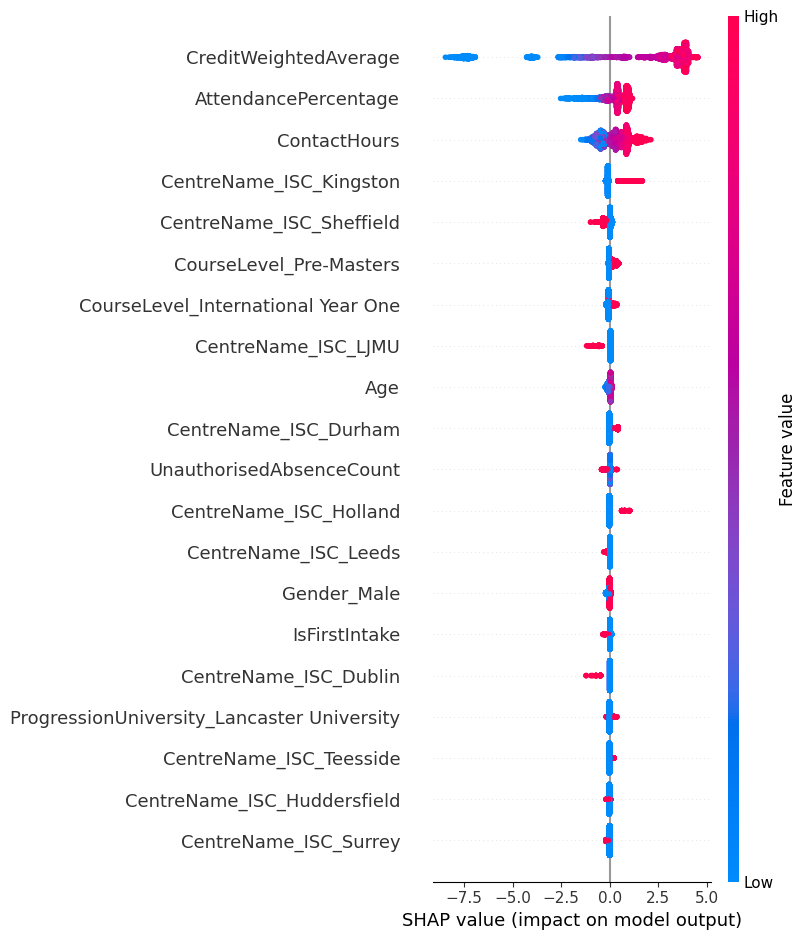

In [38]:
# Visualise the global impact of each feature
shap.summary_plot(shap_values, X_test_new)

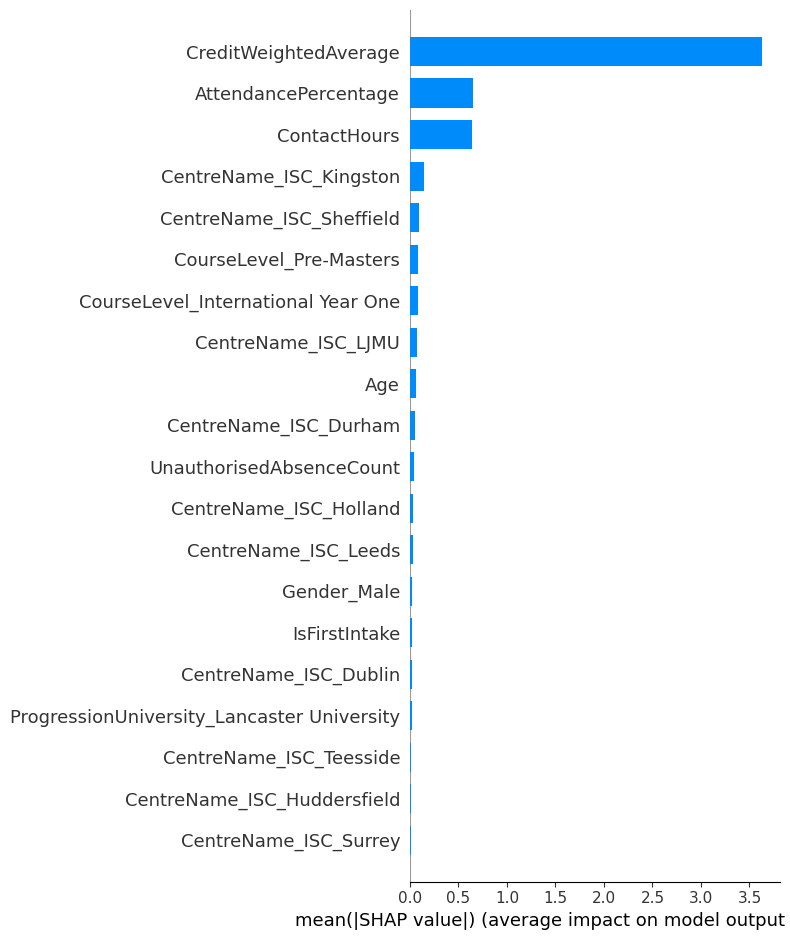

In [39]:
# Visualise feature contributions for all features
shap.summary_plot(shap_values, X_test_new, plot_type="bar")

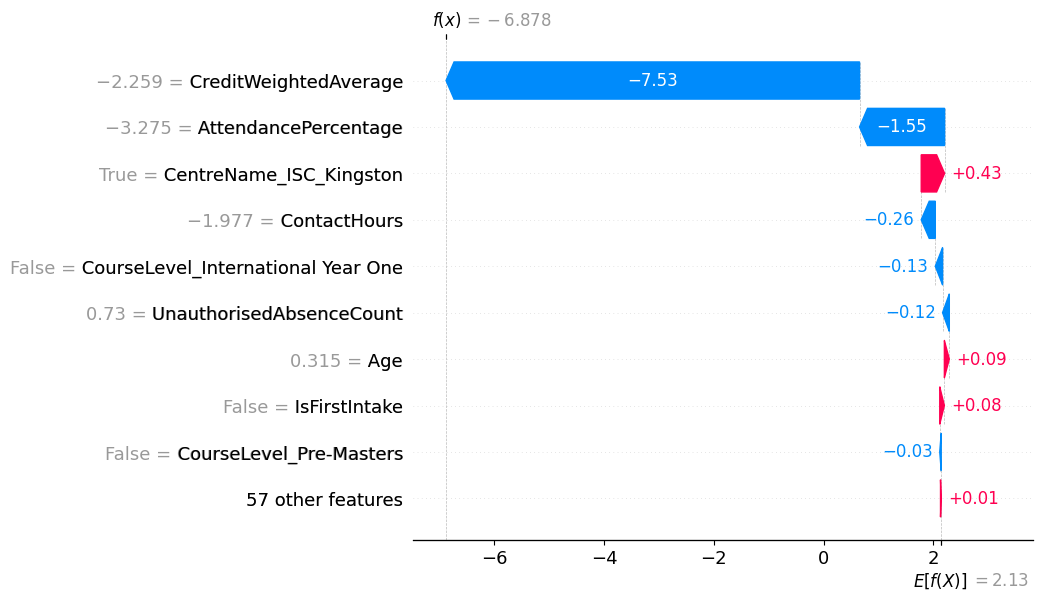

In [40]:
shap.plots.waterfall(shap_values[0])

### Comment on the most important predictors based on the plot.

Reviewing the SHAP diagrams has given me a clearer understanding of how different features impact the predictions made by the XGBoost model. Here's a summary of the insights I've gathered:

1. **Overall Feature Importance**:
   The SHAP summary plot reveals that **CreditWeightedAverage** has the most significant impact on predictions, followed by **AttendancePercentage** and **ContactHours**. This suggests that academic performance, attendance, and engagement are the most critical factors in determining whether a student is likely to drop out.

2. **SHAP Values for Individual Features**:
   When looking at the SHAP summary plot with individual impacts, it's evident that lower values for **CreditWeightedAverage** and **AttendancePercentage** strongly push predictions towards higher dropout risks. This was consistent across multiple students, highlighting that poor academic performance and attendance are leading indicators of dropout.

3. **Detailed Feature Contributions**:
   In the decision plot for a specific student, **CreditWeightedAverage** stood out as the most influential factor, heavily pushing the model towards predicting a higher likelihood of dropout due to a low value. Similarly, **AttendancePercentage** had a noticeable negative impact on the prediction, further supporting the notion that a student with poor attendance is more likely to drop out. On the other hand, features like the centre they were attending (e.g., ISC_Kingston) slightly counterbalanced these risks.

4. **Additional Features**:
   Features such as **CentreName**, **CourseLevel**, and **UnauthorisedAbsenceCount** played smaller roles but still influenced predictions. For example, being from certain centres or courses can slightly push predictions towards or away from dropout, but their influence is relatively minor compared to the academic and attendance factors.

In conclusion, the SHAP diagrams solidified the understanding that **CreditWeightedAverage** and **AttendancePercentage** are critical drivers in predicting student dropouts. The plots show how both low academic performance and low engagement are substantial risk factors, while other features such as age, course level, and unauthorised absences also contribute, but to a lesser extent. These visualisations have been incredibly helpful in explaining how the model makes its predictions, which in turn, provides actionable insights into key areas where interventions could reduce dropout rates.

# 3. Neural Network Model

## 3.1 Model Definition and Instantiation

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model creation function
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    return model

# Instantiate the model
input_shape = X_train.shape[1]  # Number of input features
nn_model = create_nn_model(input_shape)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15904 entries, 18490 to 18433
Data columns (total 64 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   IsFirstIntake                                                                                       15904 non-null  bool   
 1   CreditWeightedAverage                                                                               15904 non-null  float64
 2   UnauthorisedAbsenceCount                                                                            15904 non-null  float64
 3   Age                                                                                                 15904 non-null  float64
 4   Gender_Male                                                                                         15904 non-nul

## 3.2 Model Fitting

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model on the training data
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stop])


Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9386 - loss: 0.2073 - val_accuracy: 0.9756 - val_loss: 0.0772
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0770 - val_accuracy: 0.9741 - val_loss: 0.0764
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0757 - val_accuracy: 0.9733 - val_loss: 0.0779
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9744 - loss: 0.0709 - val_accuracy: 0.9738 - val_loss: 0.0732
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9739 - loss: 0.0698 - val_accuracy: 0.9766 - val_loss: 0.0691
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9758 - loss: 0.0680 - val_accuracy: 0.9738 - val_loss: 0.0737
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.0674 - val_accuracy: 0.9736 - val_loss: 0.0711
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0665 - val_accuracy: 0.

## 3.3 Plotting Loss Curves

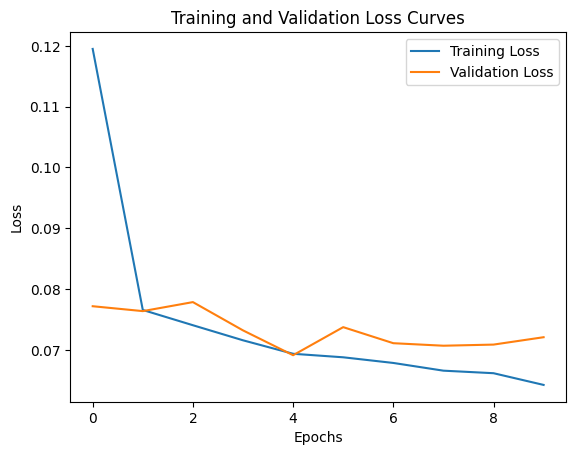

In [49]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curves(history)


## 3.4 Model Evaluation on Test Set

In [50]:
y_pred_nn = nn_model.predict(X_test).round()  # Predicting on test set
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Print the metrics
print(f"Accuracy: {accuracy_nn}")
print(f"Confusion Matrix:\n{conf_matrix_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")
print(f"AUC: {auc_nn}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9694226513779923
Confusion Matrix:
[[ 658   69]
 [  83 4161]]
Precision: 0.9836879432624114
Recall: 0.9804429783223374
AUC: 0.9427661934252677


In [45]:
'''
Print performance metrics for the test set:
Accuracy
Confusion matrix
Precision
Recall
AUC
'''
# First, evaluate performance before hyperparameter tuning
performance_before_and_after = evaluate_model_performance(nn_model, X_test, y_test, 'Neural Network (Before Tuning)')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-44-34aa6482ed7b>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, metrics_df], ignore_index=True)


,Model,Accuracy,Precision,Recall,AUC,Confusion Matrix
0,Neural Network (Before Tuning),0.971837,0.983734,0.98327,0.94418,"[[[658, 69], [71, 4173]]]"


## 3.5 Hyperparameter Tuning

In [54]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

# Define a function to create the model for GridSearchCV
def create_nn_model(neurons=64, activation='relu', optimizer='adam'):
    # Activation and optimizer are now arguments to the function
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation=activation))  # Use activation from function arguments
    model.add(Dense(neurons // 2, activation=activation))  # Use activation from function arguments
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Use optimizer from function arguments
    return model

# Wrap the model using KerasClassifier for scikit-learn compatibility
# Pass build_fn to the KerasClassifier constructor
model = KerasClassifier(model=create_nn_model, verbose=0)

# Define the grid of hyperparameters to tune
param_grid = {
    'model__neurons': [64, 128],  # Prefix hyperparameters with 'model__'
    'model__activation': ['relu', 'sigmoid'],  # Prefix hyperparameters with 'model__'
    'model__optimizer': ['adam', 'rmsprop'],  # Prefix hyperparameters with 'model__'
    'batch_size': [32, 64],
    'epochs': [5, 10, 20]
}

# Early stopping callback to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform grid search with cross-validation
grid_search_nn = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the model with the training data
grid_search_nn.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stop])

# Print the best hyperparameters found during grid search
best_params_nn = grid_search_nn.best_params_
print(f"Best Parameters: {best_params_nn}")

# Evaluate the best model on the test set
y_pred_tuned = grid_search_nn.best_estimator_.predict(X_test)

# Calculate performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the metrics for comparison
print(f"Tuned Accuracy: {accuracy_tuned}")
print(f"Tuned Precision: {precision_tuned}")
print(f"Tuned Recall: {recall_tuned}")
print(f"Tuned AUC: {auc_tuned}")
print(f"Confusion Matrix After Tuning:\n{conf_matrix_tuned}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__neurons': 64, 'model__optimizer': 'adam'}
Tuned Accuracy: 0.972037819352243
Tuned Precision: 0.981242672919109
Tuned Recall: 0.9860980207351555
Tuned AUC: 0.9380283776303013
Confusion Matrix After Tuning:
[[ 647   80]
 [  59 4185]]


In [ ]:
'''
Print and compare the metrics
with and without hyperparameter tuning
'''
performance_before_and_after = evaluate_model_performance(best_nn_model, X_test, y_test, 'Neural Network (After Tuning)', performance_before_and_after)

### Discuss the differences and improvements, if any.

TODO

## 3.6 Reintroducing Features

In [56]:
# Add back 'ContactHours' and 'AttendancePercentage' to the dataset.
# Reintroducing 'ContactHours' and 'AttendancePercentage' to the training and test sets
X_train_new = pd.concat([X_train, contact_hours.loc[X_train.index], attendance_percentage.loc[X_train.index]], axis=1)
X_test_new = pd.concat([X_test, contact_hours.loc[X_test.index], attendance_percentage.loc[X_test.index]], axis=1)

In [58]:
# Assuming your original dataset contains the 'ContactHours' and 'AttendancePercentage' columns
# Reintroducing 'ContactHours' and 'AttendancePercentage' into the feature set
# Ensure these columns exist in your original data
if 'ContactHours' in X_train.columns and 'AttendancePercentage' in X_train.columns:
    print("Features already exist in the dataset. Proceeding with reintroduction.")
else:
    # If the features are not in the current dataset, ensure they are pulled from the original dataset
    X_train_with_features = X_train.copy()
    X_val_with_features = X_val.copy()
    X_test_with_features = X_test.copy()

    X_train_with_features['ContactHours'] = original_data['ContactHours']
    X_train_with_features['AttendancePercentage'] = original_data['AttendancePercentage']

    X_val_with_features['ContactHours'] = original_data['ContactHours']
    X_val_with_features['AttendancePercentage'] = original_data['AttendancePercentage']

    X_test_with_features['ContactHours'] = original_data['ContactHours']
    X_test_with_features['AttendancePercentage'] = original_data['AttendancePercentage']

# Refit the model using the best parameters from GridSearchCV
best_model_with_features = create_nn_model(
    neurons=best_params_nn['model__neurons'],
    activation=best_params_nn['model__activation'],
    optimizer=best_params_nn['model__optimizer']
)

# Train the model again with the new dataset that has the reintroduced features
history_with_features = best_model_with_features.fit(
    X_train_with_features, y_train,
    validation_data=(X_val_with_features, y_val),
    epochs=best_params_nn['epochs'],
    batch_size=best_params_nn['batch_size'],
    callbacks=[early_stop]
)

# Evaluate the model with the reintroduced features on the test set
y_pred_with_features = (best_model_with_features.predict(X_test_with_features) > 0.5).astype(int)

# Calculate performance metrics for the model with reintroduced features
accuracy_with_features = accuracy_score(y_test, y_pred_with_features)
precision_with_features = precision_score(y_test, y_pred_with_features)
recall_with_features = recall_score(y_test, y_pred_with_features)
auc_with_features = roc_auc_score(y_test, y_pred_with_features)
conf_matrix_with_features = confusion_matrix(y_test, y_pred_with_features)

# Print the results after reintroducing the features
print(f"Accuracy with reintroduced features: {accuracy_with_features}")
print(f"Precision with reintroduced features: {precision_with_features}")
print(f"Recall with reintroduced features: {recall_with_features}")
print(f"AUC with reintroduced features: {auc_with_features}")
print(f"Confusion Matrix with reintroduced features:\n{conf_matrix_with_features}")


NameError: name 'original_data' is not defined

In [ ]:
'''
Compare the metrics and
explain any performance changes caused by the additional features.
'''